In [51]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [37]:
circle_data = make_circles()

In [43]:
# Make dataframe
circle_df = pd.DataFrame({"label": circle_data[1], "x": circle_data[0][:, 0], "y": circle_data[0][:, 1]})

circle_df

,label,x,y
0,1,0.509939,0.616411
1,0,-0.535827,0.844328
2,0,0.425779,-0.904827
3,1,0.583175,-0.547638
4,1,-0.428661,0.675462
...,...,...,...
95,1,-0.247214,-0.760845
96,0,0.992115,0.125333
97,0,-0.929776,0.368125
98,1,-0.583175,-0.547638


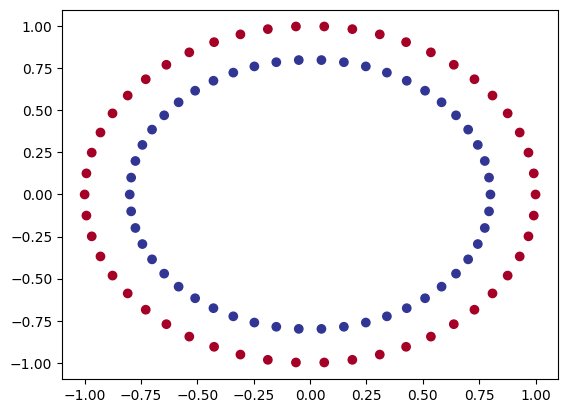

In [46]:
# Visualize

plt.scatter(circle_df["x"], circle_df["y"], c=circle_df["label"], cmap=plt.cm.RdYlBu)

In [53]:
features = circle_df.drop(columns=["label"])
labels = circle_df["label"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Model 01

In [64]:
# 1. Create model
circle_model_01 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile model
circle_model_01.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=["accuracy"]
)

# 3. Fit model
circle_model_01_history = circle_model_01.fit(X_train, y_train, epochs=500, verbose=0)

In [75]:
def visualize_model_loss(history):
    # Plotting the training loss
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Model Loss')
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()


def make_predictions(model):
    # Make predictions on the test data
    predictions = model.predict(X_test)

    # Iterate through the test data
    for i in range(10):
        print(f"Actual Value: {y_test.iloc[i]:.2f} | Predicted Value: {predictions[i][0]:.2f}")


def print_evals(model):
    train_evaluation = model.evaluate(X_train, y_train)
    test_evaluation = model.evaluate(X_test, y_test)
    print("")

    print(f"The model's training loss is: {train_evaluation[0]:.2f}")
    print(f"The model's testing loss is: {test_evaluation[0]:.2f}")


def plot_decision_boundry(model):
    # Define axis boundaries of plot and make meshgrid
    x_min, x_max = circle_df["x"].min() - 0.1, circle_df["x"].max() + 0.1
    y_min, y_max = circle_df["y"].min() - 0.1, circle_df["y"].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions using the trained model
    y_pred = model.predict(x_in)

    # Binary classification
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(circle_df["x"], circle_df["y"], c=circle_df["label"], s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

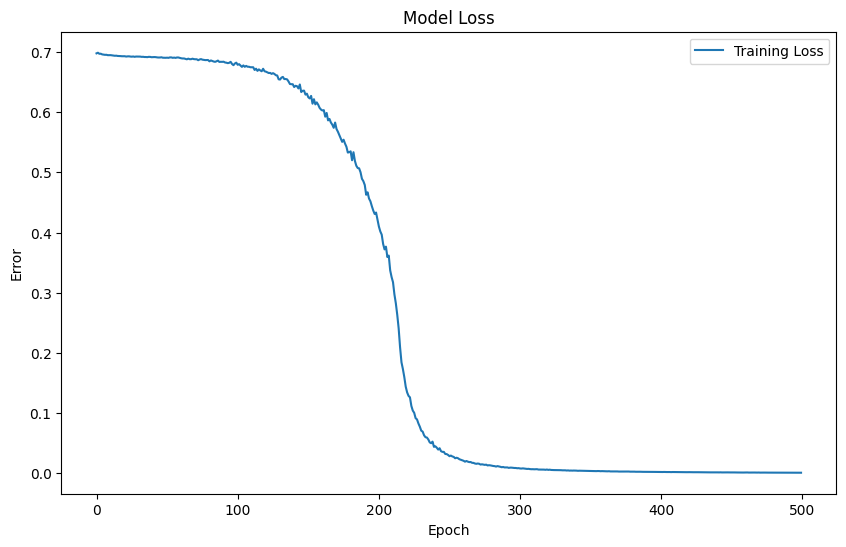

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Actual Value: 0.00 | Predicted Value: 0.00
Actual Value: 0.00 | Predicted Value: 0.00
Actual Value: 1.00 | Predicted Value: 1.00
Actual Value: 1.00 | Predicted Value: 1.00
Actual Value: 1.00 | Predicted Value: 1.00
Actual Value: 1.00 | Predicted Value: 1.00
Actual Value: 0.00 | Predicted Value: 0.00
Actual Value: 0.00 | Predicted Value: 0.00
Actual Value: 1.00 | Predicted Value: 1.00
Actual Value: 1.00 | Predicted Value: 1.00
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0012

The model's training loss is: 0.00
The model's testing loss is: 0.00


In [71]:
visualize_model_loss(circle_model_01_history)
make_predictions(circle_model_01)
print_evals(circle_model_01)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step


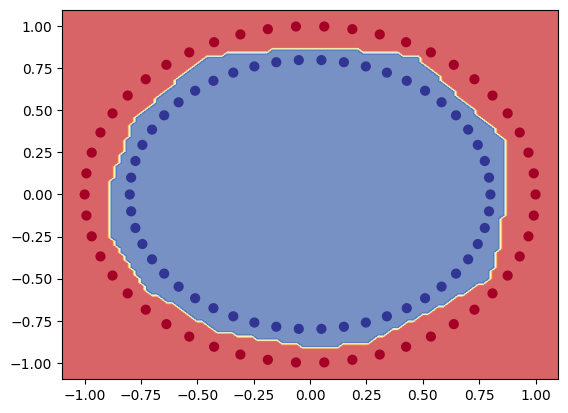

In [76]:
plot_decision_boundry(circle_model_01)